In [1]:
import numpy as np

def gauss2D(shape=(3, 3),sigma=0.5):
    """
    2D gaussian mask - should give the same result as MATLAB's
    fspecial('gaussian',[shape],[sigma])
    """
    m, n = [(ss-1.)/2. for ss in shape]
    y, x = np.ogrid[-m:m+1,-n:n+1]
    h = np.exp(-(x*x + y*y) / (2.*sigma*sigma))
    h[ h < np.finfo(h.dtype).eps*h.max() ] = 0
    sumh = h.sum()
    if sumh != 0:
        h /= sumh
    return h

In [2]:
def normalize(img):
    ''' Function to normalize an input array to 0-1 '''
    img_min = img.min()
    img_max = img.max()
    return (img - img_min) / (img_max - img_min)

In [3]:
import numpy as np
from scipy.misc import imresize

def vis_hybrid_image(hybrid_image):
    #visualize a hybrid image by progressively downsampling the image and
    #concatenating all of the images together.

    scales = 5 #how many downsampled versions to create
    scale_factor = 0.5 #how much to downsample each time
    padding = 5 #how many pixels to pad.
    
    original_height = hybrid_image.shape[0]
    num_colors = hybrid_image.shape[2] #counting how many color channels the input has
    output = hybrid_image[:]
    cur_image = hybrid_image[:]
    
    for i in range(1, scales):
        #add padding
        output = np.concatenate((output, 
                                 np.ones((original_height, padding, num_colors))),
                                 axis=1)
        
        #dowsample image;
        cur_image = imresize(cur_image, scale_factor, 'bilinear').astype(np.float)/255
        
        #pad the top and append to the output
        tmp = np.concatenate((np.ones((original_height-cur_image.shape[0],
                                       cur_image.shape[1],num_colors)), cur_image), axis=0)
        output = np.concatenate((output,tmp), axis=1)
        
    return output

In [10]:
import numpy as np

def my_imfilter(image, imfilter):
    """function which imitates the default behavior of the build in scipy.misc.imfilter function.

    Input:
        image: A 3d array represent the input image.
        imfilter: The gaussian filter.
    Output:
        output: The filtered image.
    """
    ###################################################################################
    # TODO:                                                                           #
    # This function is intended to behave like the scipy.ndimage.filters.correlate    #
    # (2-D correlation is related to 2-D convolution by a 180 degree rotation         #
    # of the filter matrix.)                                                          #
    # Your function should work for color images. Simply filter each color            #
    # channel independently.                                                          #
    # Your function should work for filters of any width and height                   #
    # combination, as long as the width and height are odd (e.g. 1, 7, 9). This       #
    # restriction makes it unambigious which pixel in the filter is the center        #
    # pixel.                                                                          #
    # Boundary handling can be tricky. The filter can't be centered on pixels         #
    # at the image boundary without parts of the filter being out of bounds. You      #
    # should simply recreate the default behavior of scipy.signal.convolve2d --       #
    # pad the input image with zeros, and return a filtered image which matches the   #
    # input resolution. A better approach is to mirror the image content over the     #
    # boundaries for padding.                                                         #
    # Uncomment if you want to simply call scipy.ndimage.filters.correlate so you can #
    # see the desired behavior.                                                       #
    # When you write your actual solution, you can't use the convolution functions    #
    # from numpy scipy ... etc. (e.g. numpy.convolve, scipy.signal)                   #
    # Simply loop over all the pixels and do the actual computation.                  #
    # It might be slow.                                                               #
    ###################################################################################
    ###################################################################################
    # NOTE:                                                                           #
    # Some useful functions                                                           #
    #     numpy.pad or numpy.lib.pad                                                  #
    # #################################################################################

    # Uncomment if you want to simply call scipy.ndimage.filters.correlate so you can
    # see the desired behavior.
    R = image[:,:,0]
    G = image[:,:,1]
    B = image[:,:,2]
    
    H_img = R.shape[0]
    W_img = R.shape[1]
    H_filter = imfilter.shape[0]
    W_filter = imfilter.shape[1]
    H_pad = int((H_filter-1)/2)
    W_pad = int((W_filter-1)/2)
    
    npad = ((H_pad, H_pad), (W_pad, W_pad))
    RGB_pad = []
    RGB_pad.append(np.pad(R, pad_width=npad, mode='reflect'))
    RGB_pad.append(np.pad(G, pad_width=npad, mode='reflect'))
    RGB_pad.append(np.pad(B, pad_width=npad, mode='reflect'))
    
    output = np.zeros_like(R)
    
    for each in RGB_pad:
        RGB_new = []
        # convolution of whole matrix
        for m in range(H_img):
            for n in range(W_img):
                # convolution in each small matrix
                total = 0
                total = np.sum(np.multiply(each[m:m+H_filter, n:n+W_filter], imfilter))
                RGB_new.append(total)
                
        RGB_new = np.asarray(RGB_new)
        RGB_new = RGB_new.reshape(H_img, W_img)
        
        # combine RGB channel into 3D array
        output = np.dstack((output, RGB_new))
        
    # remove the zeros array
    output = output[:, :, 1:]
        
#     import scipy.ndimage as ndimage
#     output = np.zeros_like(image)
#     for ch in range(image.shape[2]):
#         output[:,:,ch] = ndimage.filters.correlate(image[:,:,ch], imfilter, mode='constant')
    
    ###################################################################################
    #                                 END OF YOUR CODE                                #
    ###################################################################################
    return output

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:27: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


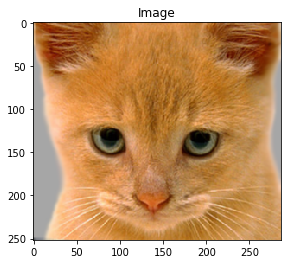

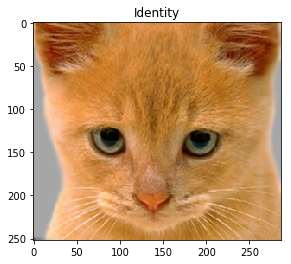

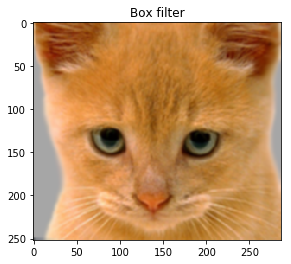

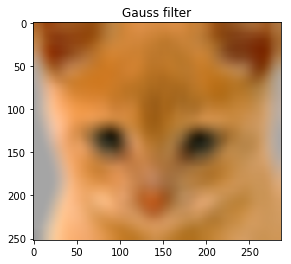

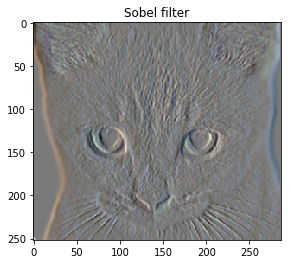

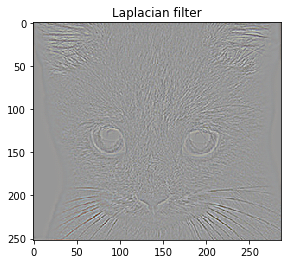

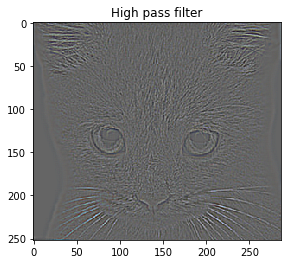

In [12]:
#this script has test cases to help you test my_imfilter() which you will
#write. You should verify that you get reasonable output here before using
#your filtering to construct a hybrid image in proj1.m. The outputs are
#all saved and you can include them in your writeup. You can add calls to
#imfilter() if you want to check that my_imfilter() is doing something
#similar.

import os

import numpy as np
from scipy.misc import imresize
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

from gauss2D import gauss2D
# from my_imfilter import my_imfilter
from normalize import normalize

def main():
    """function to helps debug your image filtering algorithm. """
# NOTE: __file__ has some problems in jupyter notebook
#     main_path = os.path.dirname(os.path.dirname(os.path.abspath(__file__)))
#     img_path = os.path.join(main_path, 'data', 'cat.bmp')
    main_path = '/Users/jimmyyuan/JimmyYuan/Computer Vision/homework-1'
    img_path = '/Users/jimmyyuan/JimmyYuan/Computer Vision/homework-1/data/cat.bmp'
    test_image = mpimg.imread(img_path)
    test_image = imresize(test_image, 0.7, interp='bilinear')
    test_image = test_image.astype(np.float32)/255
    plt.figure('Image')
    plt.title('Image')
    plt.imshow(test_image)

    ### Identify filter ###
    # This filter should do nothing regardless of the padding method you use.
    identity_filter = np.array([[0, 0, 0], [0, 1, 0], [0, 0, 0]], dtype=np.float32)
    identity_image = my_imfilter(test_image, identity_filter)
    plt.figure('Identity')
    plt.title('Identity')
    plt.imshow(identity_image)


    ### Small blur with a box filter ###
    # This filter should remove some high frequencies
    blur_filter = np.array([[1, 1, 1],
                            [1, 1, 1],
                            [1, 1, 1]])
    # making the filter sum to 1
    blur_filter = blur_filter.astype(np.float) / np.sum(blur_filter)
    blur_image = my_imfilter(test_image, blur_filter)
    plt.figure('Box filter')
    plt.title('Box filter')
    plt.imshow(normalize(blur_image))
    plt.imsave(os.path.join(main_path, 'results', 'blur_image.png'), normalize(blur_image + 0.5), dpi=95)

    ### Large blur ###
    #This blur would be slow to do directly, so we instead use the fact that
    #Gaussian blurs are separable and blur sequentially in each direction.
    large_2d_blur_filter = gauss2D(shape=(25, 25), sigma=10)
    large_blur_image = my_imfilter(test_image, large_2d_blur_filter)
    plt.figure('Gauss filter')
    plt.title('Gauss filter')
    plt.imshow(normalize(large_blur_image))
    plt.imsave(os.path.join(main_path, 'results', 'large_blur_image.png'), normalize(large_blur_image + 0.5), dpi=95)

    ### Oriented filter (Sobel Operator) ###
    sobel_filter = np.array([[-1, 0, 1],
                             [-2, 0, 2],
                             [-1, 0, 1]])
    sobel_image = my_imfilter(test_image, sobel_filter)

    #0.5 added because the output image is centered around zero otherwise and mostly black
    plt.figure('Sobel filter')
    plt.title('Sobel filter')
    plt.imshow(normalize(sobel_image+0.5))
    plt.imsave(os.path.join(main_path, 'results', 'sobel_image.png'), normalize(sobel_image + 0.5), dpi=95)


    ### High pass filter (Discrete Laplacian) ###
    laplacian_filter = np.array([[0, 1, 0],
                                 [1, -4, 1],
                                 [0, 1, 0]])
    laplacian_image = my_imfilter(test_image, laplacian_filter)

    #0.5 added because the output image is centered around zero otherwise and mostly black
    plt.figure('Laplacian filter')
    plt.title('Laplacian filter')
    plt.imshow(normalize(laplacian_image+0.5))
    plt.imsave(os.path.join(main_path, 'results', 'laplacian_image.png'), normalize(laplacian_image + 0.5), dpi=95)


    ### High pass "filter" alternative ###
    high_pass_image = test_image - blur_image #simply subtract the low frequency content

    plt.figure('High pass filter')
    plt.title('High pass filter')
    plt.imshow(normalize(high_pass_image+0.5))
    plt.imsave(os.path.join(main_path, 'results', 'high_pass_image.png'), normalize(high_pass_image + 0.5), dpi=95)
    plt.show()

if __name__ == '__main__':
    main()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  after removing the cwd from sys.path.


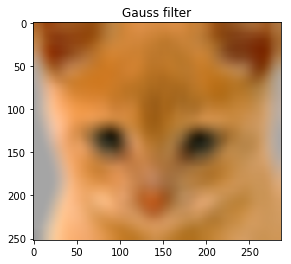

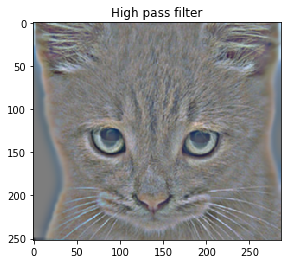

In [13]:
main_path = '/Users/jimmyyuan/JimmyYuan/Computer Vision/homework-1'
img_path = '/Users/jimmyyuan/JimmyYuan/Computer Vision/homework-1/data/cat.bmp'
test_image = mpimg.imread(img_path)
test_image = imresize(test_image, 0.7, interp='bilinear')
test_image = test_image.astype(np.float32)/255

large_2d_blur_filter = gauss2D(shape=(25, 25), sigma=10)
large_blur_image = my_imfilter(test_image, large_2d_blur_filter)
plt.figure('Gauss filter')
plt.title('Gauss filter')
plt.imshow(normalize(large_blur_image))

high_pass_image = test_image - large_blur_image #simply subtract the low frequency content

plt.figure('High pass filter')
plt.title('High pass filter')
plt.imshow(normalize(high_pass_image+0.5))
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


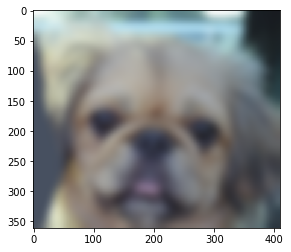

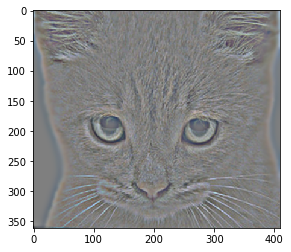

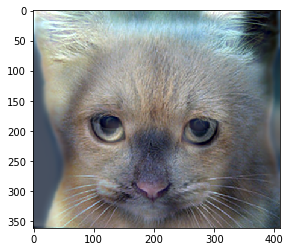

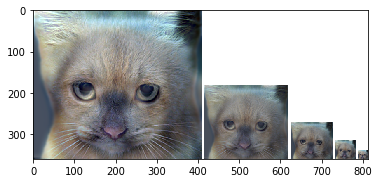

In [55]:
# Before trying to construct hybrid images, it is suggested that you
# implement my_imfilter.m and then debug it using proj1_test_filtering.py
import os
import scipy
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from PIL import Image

# from my_imfilter import my_imfilter
from vis_hybrid_image import vis_hybrid_image
from normalize import normalize
from gauss2D import gauss2D

def main():
    """ function to create hybrid images """
    # read images and convert to floating point format
#     main_path = os.path.dirname(os.path.dirname(os.path.abspath(__file__)))

    main_path = '/Users/jimmyyuan/JimmyYuan/Computer Vision/homework-1'
    image1 = mpimg.imread(os.path.join(main_path, 'data', 'dog.bmp'))
    image2 = mpimg.imread(os.path.join(main_path, 'data', 'cat.bmp'))
    image1 = image1.astype(np.float32)/255
    image2 = image2.astype(np.float32)/255

    # Several additional test cases are provided for you, but feel free to make
    # your own (you'll need to align the images in a photo editor such as
    # Photoshop). The hybrid images will differ depending on which image you
    # assign as image1 (which will provide the low frequencies) and which image
    # you asign as image2 (which will provide the high frequencies)

    ### Filtering and Hybrid Image construction ###
    cutoff_frequency_1 = 7 # This is the standard deviation, in pixels, of the 
    # Gaussian blur that will remove the high frequencies from one image and 
    # remove the low frequencies from another image (by subtracting a blurred
    # version from the original version). You will want to tune this for every
    # image pair to get the best results.
    gaussian_filter_1 = gauss2D(shape=(cutoff_frequency_1*4+1,cutoff_frequency_1*4+1), 
                              sigma = cutoff_frequency_1)
    
    #########################################################################
    # TODO: Use my_imfilter create 'low_frequencies' and                    #
    # 'high_frequencies' and then combine them to create 'hybrid_image'     #
    #########################################################################
    #########################################################################
    # Remove the high frequencies from image1 by blurring it. The amount of #
    # blur that works best will vary with different image pairs             #
    #########################################################################
    low_frequencies = my_imfilter(image1, gaussian_filter_1)
    
    ############################################################################
    # Remove the low frequencies from image2. The easiest way to do this is to #
    # subtract a blurred version of image2 from the original version of image2.#
    # This will give you an image centered at zero with negative values.       #
    ############################################################################
    cutoff_frequency_2 = 7
    gaussian_filter_2 = gauss2D(shape=(cutoff_frequency_2*4+1,cutoff_frequency_2*4+1), 
                              sigma = cutoff_frequency_2)
    low_frequencies_2 = my_imfilter(image2, gaussian_filter_2)
    high_frequencies = image2 - low_frequencies_2

    ############################################################################
    # Combine the high frequencies and low frequencies                         #
    ############################################################################
    hybrid_image = low_frequencies + high_frequencies

    # plt.imshow(normalize(high_pass_image+0.5))
    ### Visualize and save outputs ###
    plt.figure(1)
    plt.imshow(low_frequencies)
    plt.figure(2)
    plt.imshow(high_frequencies+0.5)
    plt.figure(3)
    plt.imshow(hybrid_image)
    vis = vis_hybrid_image(hybrid_image)
    plt.figure(4)
    plt.imshow(vis)
    plt.imsave(os.path.join(main_path, 'results', 'low_frequencies.png'), low_frequencies, dpi=95)
    plt.imsave(os.path.join(main_path, 'results', 'high_frequencies.png'), high_frequencies + 0.5, dpi=95)
    plt.imsave(os.path.join(main_path, 'results', 'hybrid_image.png'), hybrid_image, dpi=95)
    plt.imsave(os.path.join(main_path, 'results', 'hybrid_image_scales.png'), vis, dpi=95)

    plt.show()

if __name__ == '__main__':
    main()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


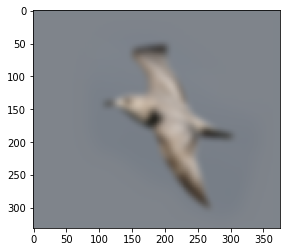

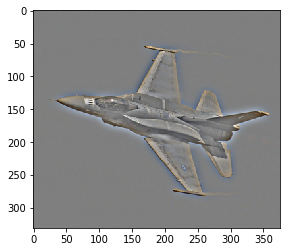

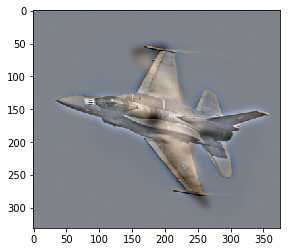

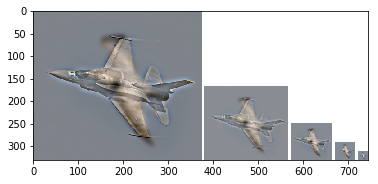

In [39]:
# Before trying to construct hybrid images, it is suggested that you
# implement my_imfilter.m and then debug it using proj1_test_filtering.py
import os
import scipy
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from PIL import Image

# from my_imfilter import my_imfilter
# from vis_hybrid_image import vis_hybrid_image
from normalize import normalize
from gauss2D import gauss2D

def main():
    """ function to create hybrid images """
    # read images and convert to floating point format
#     main_path = os.path.dirname(os.path.dirname(os.path.abspath(__file__)))

    main_path = '/Users/jimmyyuan/JimmyYuan/Computer Vision/homework-1'
    image1 = mpimg.imread(os.path.join(main_path, 'data', 'bird.bmp'))
    image2 = mpimg.imread(os.path.join(main_path, 'data', 'plane.bmp'))
    image1 = image1.astype(np.float32)/255
    image2 = image2.astype(np.float32)/255


    cutoff_frequency_1 = 5
    gaussian_filter_1 = gauss2D(shape=(cutoff_frequency_1*4+1,cutoff_frequency_1*4+1), 
                              sigma = cutoff_frequency_1)
    low_frequencies = my_imfilter(image1, gaussian_filter_1)
    
    
    cutoff_frequency_2 = 6
    gaussian_filter_2 = gauss2D(shape=(cutoff_frequency_2*4+1,cutoff_frequency_2*4+1), 
                              sigma = cutoff_frequency_2)
    low_frequencies_2 = my_imfilter(image2, gaussian_filter_2)
    high_frequencies = image2 - low_frequencies_2
    
    hybrid_image = low_frequencies + high_frequencies

    # plt.imshow(normalize(high_pass_image+0.5))
    ### Visualize and save outputs ###
    plt.figure(1)
    plt.imshow(low_frequencies)
    plt.figure(2)
    plt.imshow(high_frequencies+0.5)
    plt.figure(3)
    plt.imshow(hybrid_image)
    vis = vis_hybrid_image(hybrid_image)
    plt.figure(4)
    plt.imshow(vis)
    plt.imsave(os.path.join(main_path, 'results', 'low_frequencies2.png'), low_frequencies, dpi=95)
    plt.imsave(os.path.join(main_path, 'results', 'high_frequencies2.png'), high_frequencies + 0.5, dpi=95)
    plt.imsave(os.path.join(main_path, 'results', 'hybrid_image2.png'), hybrid_image, dpi=95)
    plt.imsave(os.path.join(main_path, 'results', 'hybrid_image_scales2.png'), vis, dpi=95)

    plt.show()

if __name__ == '__main__':
    main()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


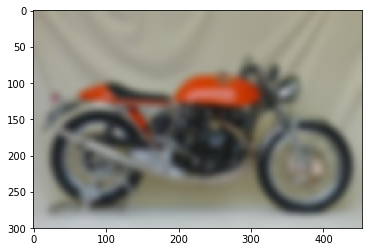

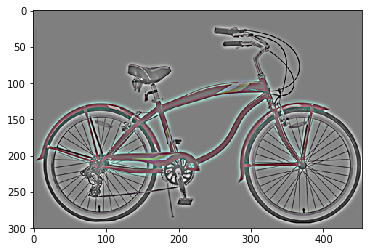

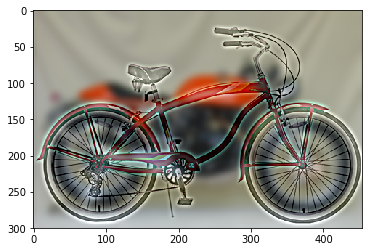

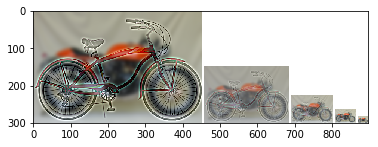

In [44]:
# Before trying to construct hybrid images, it is suggested that you
# implement my_imfilter.m and then debug it using proj1_test_filtering.py
import os
import scipy
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from PIL import Image

# from my_imfilter import my_imfilter
# from vis_hybrid_image import vis_hybrid_image
from normalize import normalize
from gauss2D import gauss2D

def main():
    """ function to create hybrid images """
    # read images and convert to floating point format
#     main_path = os.path.dirname(os.path.dirname(os.path.abspath(__file__)))

    main_path = '/Users/jimmyyuan/JimmyYuan/Computer Vision/homework-1'
    image1 = mpimg.imread(os.path.join(main_path, 'data', 'motorcycle.bmp'))
    image2 = mpimg.imread(os.path.join(main_path, 'data', 'bicycle.bmp'))
    image1 = image1.astype(np.float32)/255
    image2 = image2.astype(np.float32)/255

    cutoff_frequency_1 = 5
    gaussian_filter_1 = gauss2D(shape=(cutoff_frequency_1*4+1,cutoff_frequency_1*4+1), 
                              sigma = cutoff_frequency_1)
    low_frequencies = my_imfilter(image1, gaussian_filter_1)
    
    
    cutoff_frequency_2 = 3
    gaussian_filter_2 = gauss2D(shape=(cutoff_frequency_2*4+1,cutoff_frequency_2*4+1), 
                              sigma = cutoff_frequency_2)
    low_frequencies_2 = my_imfilter(image2, gaussian_filter_2)
    high_frequencies = image2 - low_frequencies_2
    
    hybrid_image = low_frequencies + high_frequencies

    # plt.imshow(normalize(high_pass_image+0.5))
    ### Visualize and save outputs ###
    plt.figure(1)
    plt.imshow(low_frequencies)
    plt.figure(2)
    plt.imshow(high_frequencies+0.5)
    plt.figure(3)
    plt.imshow(hybrid_image)
    vis = vis_hybrid_image(hybrid_image)
    plt.figure(4)
    plt.imshow(vis)
    plt.imsave(os.path.join(main_path, 'results', 'low_frequencies3.png'), low_frequencies, dpi=95)
    plt.imsave(os.path.join(main_path, 'results', 'high_frequencies3.png'), high_frequencies + 0.5, dpi=95)
    plt.imsave(os.path.join(main_path, 'results', 'hybrid_image3.png'), hybrid_image, dpi=95)
    plt.imsave(os.path.join(main_path, 'results', 'hybrid_image_scales3.png'), vis, dpi=95)

    plt.show()

if __name__ == '__main__':
    main()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


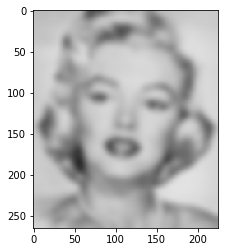

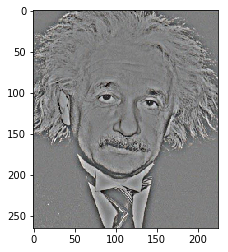

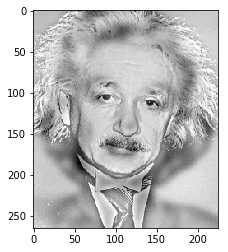

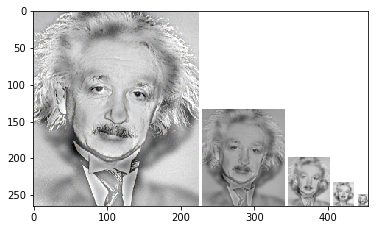

In [45]:
# Before trying to construct hybrid images, it is suggested that you
# implement my_imfilter.m and then debug it using proj1_test_filtering.py
import os
import scipy
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from PIL import Image

# from my_imfilter import my_imfilter
# from vis_hybrid_image import vis_hybrid_image
from normalize import normalize
from gauss2D import gauss2D

def main():
    """ function to create hybrid images """
    # read images and convert to floating point format
#     main_path = os.path.dirname(os.path.dirname(os.path.abspath(__file__)))

    main_path = '/Users/jimmyyuan/JimmyYuan/Computer Vision/homework-1'
    image1 = mpimg.imread(os.path.join(main_path, 'data', 'marilyn.bmp'))
    image2 = mpimg.imread(os.path.join(main_path, 'data', 'einstein.bmp'))
    image1 = image1.astype(np.float32)/255
    image2 = image2.astype(np.float32)/255
    
    cutoff_frequency = 4
    gaussian_filter = gauss2D(shape=(cutoff_frequency*4+1,cutoff_frequency*4+1), 
                              sigma = cutoff_frequency)

    low_frequencies = my_imfilter(image1, gaussian_filter)

    low_frequencies_2 = my_imfilter(image2, gaussian_filter)
    high_frequencies = image2 - low_frequencies_2
    
    hybrid_image = low_frequencies + high_frequencies

    # plt.imshow(normalize(high_pass_image+0.5))
    ### Visualize and save outputs ###
    plt.figure(1)
    plt.imshow(low_frequencies)
    plt.figure(2)
    plt.imshow(high_frequencies+0.5)
    plt.figure(3)
    plt.imshow(hybrid_image)
    vis = vis_hybrid_image(hybrid_image)
    plt.figure(4)
    plt.imshow(vis)
    plt.imsave(os.path.join(main_path, 'results', 'low_frequencies4.png'), low_frequencies, dpi=95)
    plt.imsave(os.path.join(main_path, 'results', 'high_frequencies4.png'), high_frequencies + 0.5, dpi=95)
    plt.imsave(os.path.join(main_path, 'results', 'hybrid_image4.png'), hybrid_image, dpi=95)
    plt.imsave(os.path.join(main_path, 'results', 'hybrid_image_scales4.png'), vis, dpi=95)

    plt.show()

if __name__ == '__main__':
    main()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


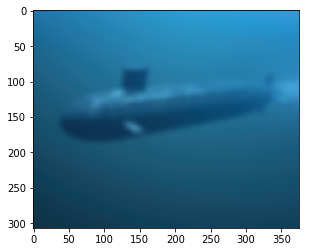

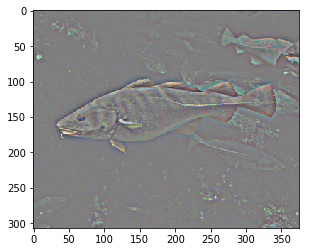

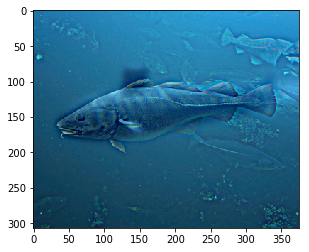

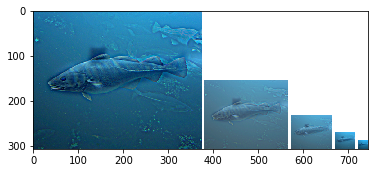

In [47]:
# Before trying to construct hybrid images, it is suggested that you
# implement my_imfilter.m and then debug it using proj1_test_filtering.py
import os
import scipy
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from PIL import Image

# from my_imfilter import my_imfilter
# from vis_hybrid_image import vis_hybrid_image
from normalize import normalize
from gauss2D import gauss2D

def main():
    """ function to create hybrid images """
    # read images and convert to floating point format
#     main_path = os.path.dirname(os.path.dirname(os.path.abspath(__file__)))

    main_path = '/Users/jimmyyuan/JimmyYuan/Computer Vision/homework-1'
    image1 = mpimg.imread(os.path.join(main_path, 'data', 'submarine.bmp'))
    image2 = mpimg.imread(os.path.join(main_path, 'data', 'fish.bmp'))
    image1 = image1.astype(np.float32)/255
    image2 = image2.astype(np.float32)/255


    cutoff_frequency_1 = 4
    gaussian_filter_1 = gauss2D(shape=(cutoff_frequency_1*4+1,cutoff_frequency_1*4+1), 
                              sigma = cutoff_frequency_1)
    low_frequencies = my_imfilter(image1, gaussian_filter_1)

    cutoff_frequency_2 = 4
    gaussian_filter_2 = gauss2D(shape=(cutoff_frequency_2*4+1,cutoff_frequency_2*4+1), 
                              sigma = cutoff_frequency_2)
    low_frequencies_2 = my_imfilter(image2, gaussian_filter_2)
    high_frequencies = image2 - low_frequencies_2

    hybrid_image = low_frequencies + high_frequencies

    # plt.imshow(normalize(high_pass_image+0.5))
    ### Visualize and save outputs ###
    plt.figure(1)
    plt.imshow(low_frequencies)
    plt.figure(2)
    plt.imshow(high_frequencies+0.5)
    plt.figure(3)
    plt.imshow(hybrid_image)
    vis = vis_hybrid_image(hybrid_image)
    plt.figure(4)
    plt.imshow(vis)
    plt.imsave(os.path.join(main_path, 'results', 'low_frequencies5.png'), low_frequencies, dpi=95)
    plt.imsave(os.path.join(main_path, 'results', 'high_frequencies5.png'), high_frequencies + 0.5, dpi=95)
    plt.imsave(os.path.join(main_path, 'results', 'hybrid_image5.png'), hybrid_image, dpi=95)
    plt.imsave(os.path.join(main_path, 'results', 'hybrid_image_scales5.png'), vis, dpi=95)

    plt.show()

if __name__ == '__main__':
    main()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


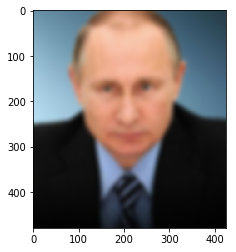

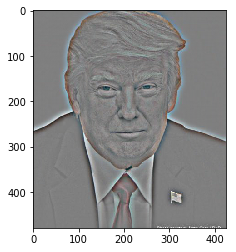

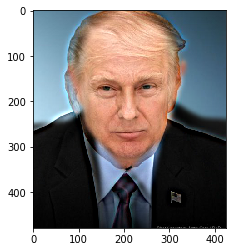

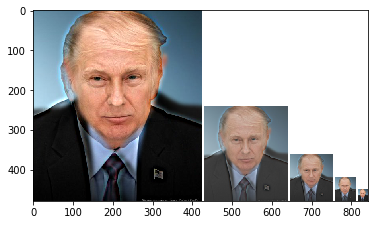

In [49]:
def main():
    """ function to create hybrid images """
    # read images and convert to floating point format
#     main_path = os.path.dirname(os.path.dirname(os.path.abspath(__file__)))

    main_path = '/Users/jimmyyuan/JimmyYuan/Computer Vision/homework-1'
    image1 = mpimg.imread(os.path.join(main_path, 'data', 'Putin.jpg'))
    image2 = mpimg.imread(os.path.join(main_path, 'data', 'Trump.jpg'))
    image1 = image1.astype(np.float32)/255
    image2 = image2.astype(np.float32)/255


    cutoff_frequency_1 = 5
    gaussian_filter_1 = gauss2D(shape=(cutoff_frequency_1*4+1,cutoff_frequency_1*4+1), 
                              sigma = cutoff_frequency_1)
    low_frequencies = my_imfilter(image1, gaussian_filter_1)

    cutoff_frequency_2 = 7
    gaussian_filter_2 = gauss2D(shape=(cutoff_frequency_2*4+1,cutoff_frequency_2*4+1), 
                              sigma = cutoff_frequency_2)
    low_frequencies_2 = my_imfilter(image2, gaussian_filter_2)
    high_frequencies = image2 - low_frequencies_2

    hybrid_image = low_frequencies + high_frequencies

    # plt.imshow(normalize(high_pass_image+0.5))
    ### Visualize and save outputs ###
    plt.figure(1)
    plt.imshow(low_frequencies)
    plt.figure(2)
    plt.imshow(high_frequencies+0.5)
    plt.figure(3)
    plt.imshow(hybrid_image)
    vis = vis_hybrid_image(hybrid_image)
    plt.figure(4)
    plt.imshow(vis)
    plt.imsave(os.path.join(main_path, 'results', 'low_frequencies6.png'), low_frequencies, dpi=95)
    plt.imsave(os.path.join(main_path, 'results', 'high_frequencies6.png'), high_frequencies + 0.5, dpi=95)
    plt.imsave(os.path.join(main_path, 'results', 'hybrid_image6.png'), hybrid_image, dpi=95)
    plt.imsave(os.path.join(main_path, 'results', 'hybrid_image_scales6.png'), vis, dpi=95)

    plt.show()

if __name__ == '__main__':
    main()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


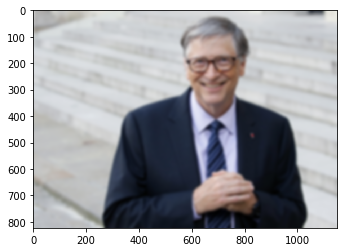

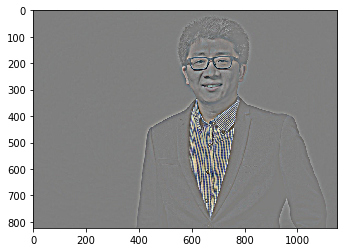

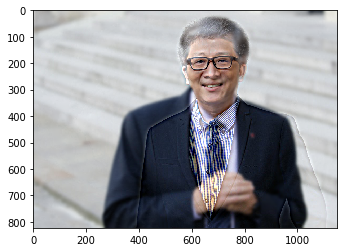

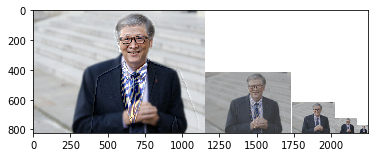

In [54]:
def main():
    """ function to create hybrid images """
    # read images and convert to floating point format
#     main_path = os.path.dirname(os.path.dirname(os.path.abspath(__file__)))

    main_path = '/Users/jimmyyuan/JimmyYuan/Computer Vision/homework-1'
    image1 = mpimg.imread(os.path.join(main_path, 'data', 'Bill Gates.jpg'))
    image2 = mpimg.imread(os.path.join(main_path, 'data', 'Min Sun.jpg'))
    image1 = image1.astype(np.float32)/255
    image2 = image2.astype(np.float32)/255


    cutoff_frequency_1 = 5
    gaussian_filter_1 = gauss2D(shape=(cutoff_frequency_1*4+1,cutoff_frequency_1*4+1), 
                              sigma = cutoff_frequency_1)
    low_frequencies = my_imfilter(image1, gaussian_filter_1)

    cutoff_frequency_2 = 7
    gaussian_filter_2 = gauss2D(shape=(cutoff_frequency_2*4+1,cutoff_frequency_2*4+1), 
                              sigma = cutoff_frequency_2)
    low_frequencies_2 = my_imfilter(image2, gaussian_filter_2)
    high_frequencies = image2 - low_frequencies_2

    hybrid_image = low_frequencies + high_frequencies

    # plt.imshow(normalize(high_pass_image+0.5))
    ### Visualize and save outputs ###
    plt.figure(1)
    plt.imshow(low_frequencies)
    plt.figure(2)
    plt.imshow(high_frequencies+0.5)
    plt.figure(3)
    plt.imshow(hybrid_image)
    vis = vis_hybrid_image(hybrid_image)
    plt.figure(4)
    plt.imshow(vis)
    plt.imsave(os.path.join(main_path, 'results', 'low_frequencies7.png'), low_frequencies, dpi=95)
    plt.imsave(os.path.join(main_path, 'results', 'high_frequencies7.png'), high_frequencies + 0.5, dpi=95)
    plt.imsave(os.path.join(main_path, 'results', 'hybrid_image7.png'), hybrid_image, dpi=95)
    plt.imsave(os.path.join(main_path, 'results', 'hybrid_image_scales7.png'), vis, dpi=95)

    plt.show()

if __name__ == '__main__':
    main()